# Graphs

## Graph Terminologies
**Degree of a Vertex:** The total number of edges incident on a vertex. There are two types of degrees:

**In-Degree:** The total number of incoming edges of a vertex.

**Out-Degree:** The total number of outgoing edges of a vertex.

**Parallel Edges:** Two undirected edges are parallel if they have the same end vertices. Two directed edges are parallel if they have the same starting and ending vertices.

**Self Loop:** This occurs when an edge starts and ends on the same vertex.

**Adjacency:** Two vertices are said to be adjacent if there is an edge connecting them directly.



There are two common types of graphs:

1. Undirected
2. Directed

The two most common ways to represent a graph are:

1. Adjacency Matrix
2. Adjacency List

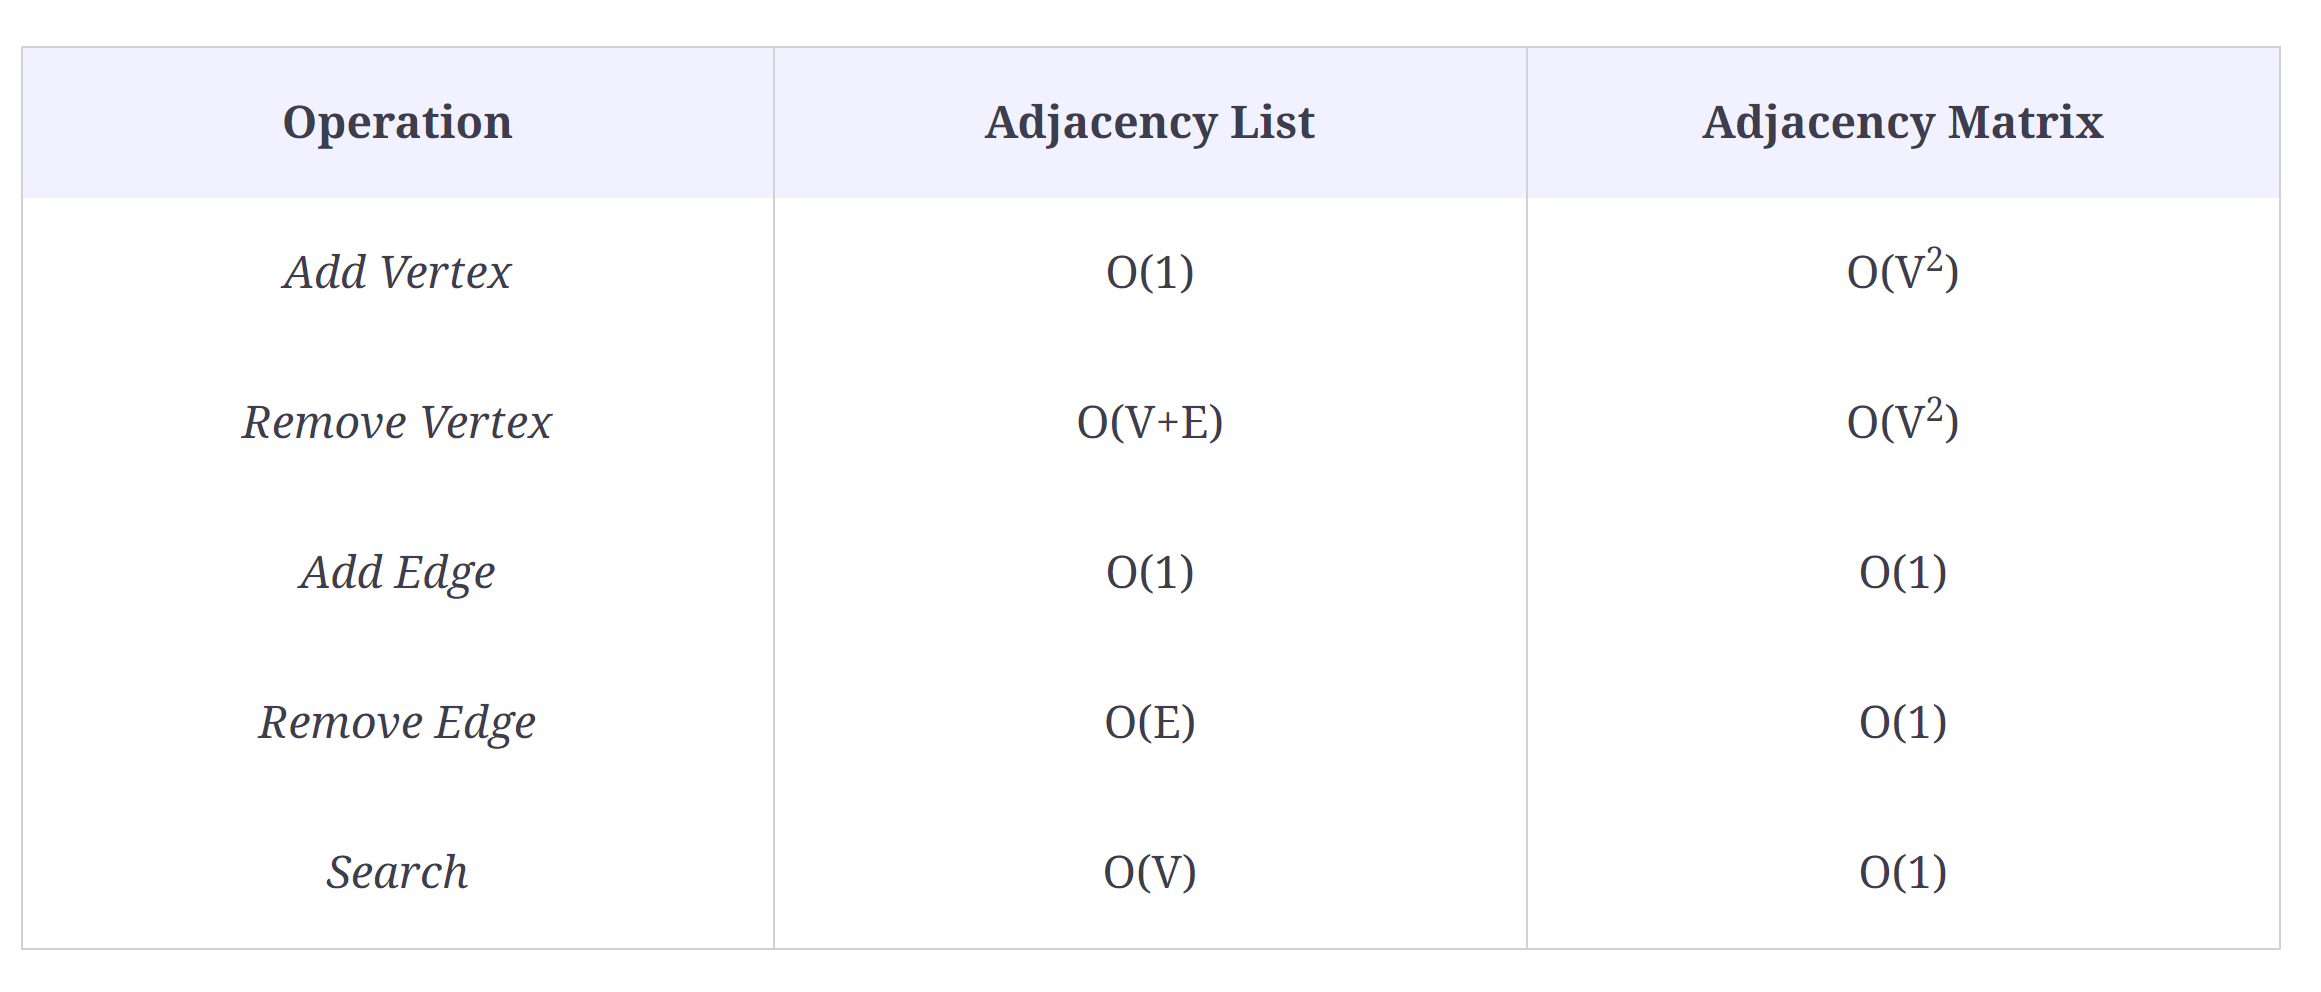

## Graph traversal algorithms

1. Breadth First Search (BFS)
2. Depth First Search (DFS)

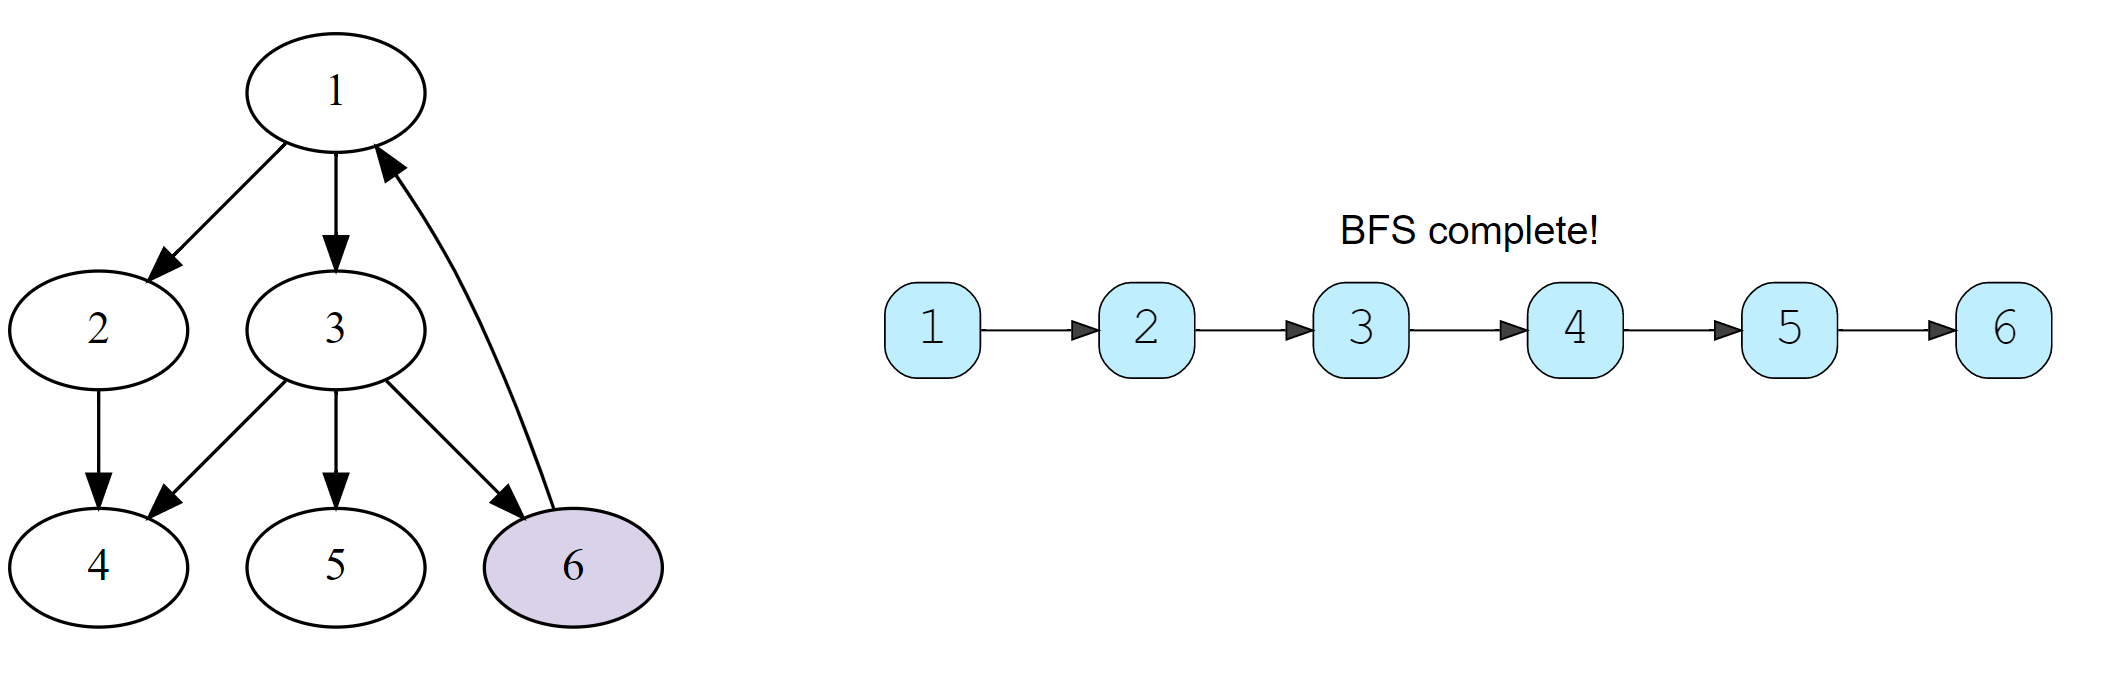

**DFS**

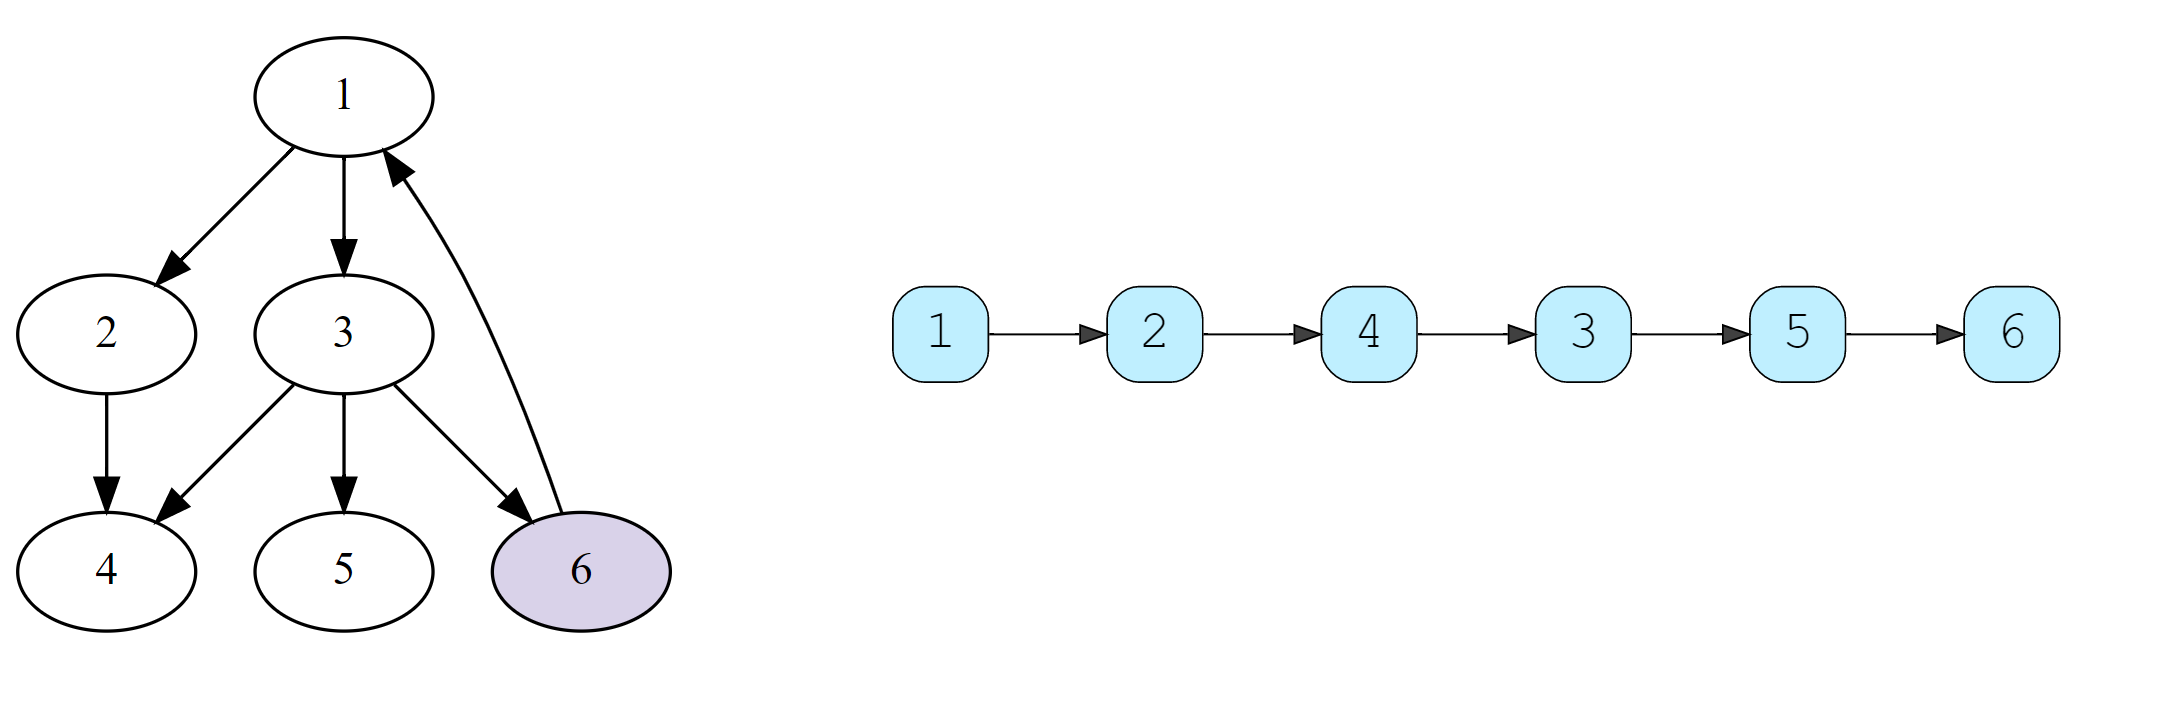

### BFS implementation

In [ ]:
'''
Breadth first search for a directed graph
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.list = defaultdict(list)

    def addEdge(self,u,v):
        self.list[u].append(v)

    def BFS(self,start_node):
        # initialize visited list
        visited = set()

        # For BFS, queue is used
        queue = []

        # 1. Add to queue and mark the node as visited
        queue.append(start_node)
        visited.add(start_node)

        while queue:
            s = queue.pop(0) # O(N). Instead can use deque() which makes it O(1)
            
            # add vertices which are edges to start node(2)
            for i in self.list[s]:
                if i not in visited:
                    queue.append(i)
                    visited.add(i)


g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)
g.BFS(2)


### DFS implementation

In [6]:
'''
Depth first search for a directed graph
For an undirected graph, you'll add a reverse edge
self.graph[v].append(u) at line 14
'''
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)

    # 1. Visit one vertex, go to one of its adjacent vertex and then repeat
    def DFS(self,s):
        visited = set()
        
        self.DFS_helper(s, visited)

    def DFS_helper(self, v, visited):
        print(v)
        visited.add(v)
        
        for i in self.graph[v]:
            if i not in visited:
                visited.add(i)
                self.DFS_helper(i, visited)

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
# g.addEdge(3, 3)

g.DFS(1)


1
2
0
3


### [Clone graph](https://leetcode.com/problems/clone-graph/)

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = []):
        self.val = val
        self.neighbors = neighbors
"""


class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        # BFS
        if not node:
            return

        def BFS(node):
            visited = set()
            queue = []
            # add node to the queue
            queue.insert(0, node)
            # update visited
            visited.add(node)
            while queue:
                node = queue.pop()

                # clone the node
                clone_node = Node()
                clone_node.val = node.val
                hashmap[node] = clone_node

                for nei in node.neighbors:
                    if nei not in visited:
                        visited.add(nei)
                        queue.insert(0, nei)

        hashmap = {}
        BFS(node)
        for key, val in hashmap.items():
            for nei in key.neighbors:
                c_node = hashmap[nei]
                val.neighbors.append(c_node)

        return hashmap[node]

## Cycle detection

### Detect a cycle in a directed graph

In [ ]:
class Solution:
    def hasCycle(self, adjList):
        # dfs
        def dfs(node, visited):
            visited.add(node)

            for nei in graph[node]:
                if nei not in visited:
                    if dfs(nei, visited):
                        return True
            return False

        # create a directed graph
        graph = collections.defaultdict(list)
        for u, v in adjList:
            graph[u].append(v)

        visited = set()
        for node in list(graph):
            dfs(node)
        visited.add(node)

### Detect a cycle in an undirected graph

In [3]:
from collections import defaultdict
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)
        
    def hasCycle(self, node):
        visited = set()

        print(self.dfs(node, visited, -1))

    def dfs(self,node, visited, parent):

        visited.add(node)
        for neighbor in self.graph[node]:
            if neighbor not in visited:
                # keep track of the parent node
                if self.dfs(neighbor, visited, node):
                    return True
            # if node's parent and node's neighbor are not equal
            elif parent != neighbor:
                return True
        return False


g = Graph()
g.addEdge(1, 2)
g.addEdge(2, 3)
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(5, 2)
g.hasCycle(1)


True


## Topological sort

**Using DFS**

**Using indegree concept**

### Course schedule

In [ ]:
'''
Approach:
Difficulties faced:
Steps to resolve Difficulties:
Time complexity: O()
Space complexity: O()

Algorithm:
1. Check for cycle in the graph
'''

from collections import defaultdict
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # num of courses = num of vertices
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        indegree = [0] * numCourses
        graph = defaultdict(list)

        # create adjacency list
        for pr in prerequisites:
            # pr[1] = vertex
            # pr[0] = adj vertex
            graph[pr[1]].append(pr[0])
            indegree[pr[0]] += 1


        queue = []

        for vertex in range(len(indegree)):
            # if indegree[i] is 0, add to queue
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            # pop
            v = queue.pop(0)

            # check for popped vertex neighbors and decrement their indegree
            for nei in graph[v]:
                indegree[nei] -= 1

                if indegree[n] == 0:
                    queue.append(n)

            count += 1

        return count == numCourses


In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        
        ## RC ##
        ## APPROACH : GRAPH / DFS ##
        
        # DETECT CYCLE IN DIRECTED GRAPH.
        # DFS function will return False when a cycle is detected else returns True. (at one particular node)
        
        def isCycle(node, graph, exploring, explored):
            
            if(node in exploring):                     # Cycle detected. If you are still exploring and found the same element again in exploring.
                return True
            
            if(node in explored):                       
                return False

            exploring.add(node)                         # mark this node as visited.
                                                         
            for currNode in graph[node]:                # visit all children of this node.
                if(isCycle(currNode, graph, exploring, explored)):
                    return True                         # if one of its childs returns, its already visited
            
            explored.add(node)
            exploring.remove(node)
            
            return False
        
        
        graph = collections.defaultdict(list)
        
        for item in prerequisites:
            graph[item[0]].append(item[1])

        explored = set()                                 # To keep track of explored nodes in the graph
        exploring = set()                                # still in exploring, not yet finished.
        
        for node in list(graph):                         # watch out => list(graph)
            if(node not in explored):
                if(isCycle(node, graph, exploring, explored)):         
                    return False
        return True

### [Course schedule 2](https://leetcode.com/problems/course-schedule-ii/)

In [ ]:
'''
Approach: Topological sort
Difficulties faced:
Steps to resolve Difficulties:
Time complexity: O(V+E)
Space complexity: O(V)

Algorithm:

'''

from collections import defaultdict
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List:
        # num of courses = num of vertices
        # prerequisites is the [u,v] (edges)

        # detect a cycle in the graph
        indegree = [0] * numCourses
        graph = defaultdict(list)
        result = []
        # create adjacency list
        for pr in prerequisites:
            # pr[1] = vertex
            # pr[0] = adj vertex
            graph[pr[1]].append(pr[0])
            indegree[pr[0]] += 1

        # push only those vertices whose indegree is 0
        queue = []

        for vertex in range(len(indegree)):
            # if indegree[i] is 0, add to queue
            if indegree[vertex] == 0:
                queue.append(vertex)

        count = 0

        while queue:
            # pop
            v = queue.pop(0)
            result.append(v)
            # check for popped vertex neighbors and decrement their indegree
            for n in graph[v]:
                indegree[n] -= 1

                if indegree[n] == 0:
                    queue.append(n)

            # as we visited a node
            count += 1
        #print(result)
        return result if count == numCourses else []


In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
           
        ## RC ##
        ## APPROACH : GRAPH / DFS ##
        ## Similar to 207. COURSE SCHEDULE
        
        # DETECT CYCLE IN DIRECTED GRAPH.        
        def isCycle(node, graph, exploring, explored):
            
            if(node in exploring): # Cycle detected. If you are still exploring and found the same element again in exploring.
                return True
            
            if(node in explored):                       
                return False
            
            exploring.add(node)                         # mark this node as visited.
            for currNode in graph[node]:                # visit all children of this node.
                if(isCycle(currNode, graph, exploring, explored)):
                    return True                        # if one of its childs returns, its already visited
            
            explored.append(node)    
            exploring.remove(node)
            return False
            
        graph = collections.defaultdict(list)           
        for i in range(numCourses):                     
            graph[i] = []
            
        for item in prerequisites:
            graph[item[1]].append(item[0])
        
        explored = []                                    # To keep track of explored nodes in the graph
        exploring = set()                                # still in exploring, not yet finished.
        
        for node in list(graph):                         # watch out => list(graph)
            if(node not in explored):
                if(isCycle(node, graph, exploring, explored)):
                    return []                            # cycle found.
                    
                else:
                    if(len(explored) == numCourses):
                        return explored[::-1]
        return explored[::-1]

## Minimum spanning tree

### Kruskal's algorithm

### Djikstra's algorithm

### Floyd Warshall algorithm

## Easy problems

## Medium problems

### [Rotting oranges](https://leetcode.com/problems/rotting-oranges/)

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        row, col = len(grid), len(grid[0])
        
        queue = collections.deque()
        num_fresh = 0
        
        for i in range(row):
            for j in range(col):
                
                # check for fresh oranges
                if grid[i][j] == 1:
                    num_fresh += 1
                # add rotten oranges to queue 
                elif grid[i][j] == 2:
                    queue.append((i,j))
                
        mins = 0        
        directions = [[1,0],[0,1],[-1,0],[0,-1]]        
        while queue:
            
            for _ in range(len(queue)):
                i,j = queue.popleft()
                # check for all four directions for fresh oranges
                
                for x, y in directions:
                    if 0<= i+x < row and 0<= j+y < col:
                        
                        if grid[i+x][j+y] == 1:
                            
                            grid[i+x][j+y] = 2
                            num_fresh -= 1
                            queue.append((i+x,j+y))
                        
            mins += 1
            if num_fresh == 0:
                break
        
        return mins if num_fresh == 0 else -1
                

### [Number of Islands](https://leetcode.com/problems/number-of-islands/)

In [ ]:
'''
Time complexity : O(MN) where M is the number of rows and N is the number of columns.

Space complexity : worst case O(M N) in case that the grid map is filled with lands where DFS goes by M×N deep
'''
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
              # base case:
        if not grid:
            return 0
        count = 0

        for i in range(len(grid)):
            # traversing through a row
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    self.dfs(grid, i , j)
                    count += 1
        return count 

    def dfs(self, grid, i , j):
        if i < 0 or j < 0 or i >= len(grid) or j>= len(grid[0]) or grid[i][j] != '1':
            return
        # Visited node values are changed
        grid[i][j] = '#'
        # Move into 4 directions
        self.dfs(grid, i+1, j)
        self.dfs(grid, i-1, j)
        self.dfs(grid, i, j+1)
        self.dfs(grid, i, j-1)
        
'''
Follow up: Try union find algorithm
'''

### [Number of distinct islands](https://leetcode.com/problems/number-of-distinct-islands/)

In [ ]:
class Solution:
    def numDistinctIslands(self, grid: List[List[int]]) -> int:

        # base case:
        if not grid:
            return 0
        # self.path = []
        distinct = set()
        # print(self.path)
        for i in range(len(grid)):
            # traversing through a row
            for j in range(len(grid[0])):
                self.path = []
                if grid[i][j] == 1:
                    self.dfs(grid, i, j, -i, -j)
                    # print(path)
                    distinct.add(tuple(self.path))

        # print(distinct)
        return len(distinct)

    def dfs(self, grid, i, j, x, y):
        # boundary condiitons

        if 0 <= i < len(grid) and 0 <= j < len(grid[0]) and grid[i][j] == 1:

            # Visited node values are changed
            self.path.append((i + x, j + y))
            grid[i][j] = 0
            # print(self.path)
            # Move into 4 directions
            self.dfs(grid, i + 1, j, x, y)
            self.dfs(grid, i - 1, j, x, y)
            self.dfs(grid, i, j + 1, x, y)
            self.dfs(grid, i, j - 1, x, y)

### [Reconstruct itinerary](https://leetcode.com/problems/reconstruct-itinerary/)

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        from collections import defaultdict
        self.flightMap = defaultdict(list)

        for ticket in tickets:
            origin, dest = ticket[0], ticket[1]
            self.flightMap[origin].append(dest)

        for origin, itinerary in self.flightMap.items():
            # Note that we could have multiple identical flights, i.e. same origin and destination.
            itinerary.sort(reverse=True)

        self.result = []
        self.DFS('JFK')

        return self.result[::-1]

    def DFS(self, origin):
        destlist = self.flightMap[origin]
        while destlist:
            nextDest = destlist.pop()
            self.DFS(nextDest)

        self.result.append(origin)

### Evaluate division

### [Is graph bipartite](https://leetcode.com/problems/is-graph-bipartite/)

In [ ]:
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        # graph coloring
        def BFS(node):
            queue = []
            
            color[node] = 0
            queue.append(node)
            while queue:
                n = queue.pop(0)
                c = color[n]
                for nei in graph_struct[n]:
                
                    if color[nei] == c:
                        return False
                    if color[nei] == -1 and color[nei] != c:
                        queue.append(nei)
                        color[nei] = 1-c
            return True
                        
                        
        graph_struct = collections.defaultdict()
        color = {}
        # print(graph[0])
        for i in range(len(graph)):
            graph_struct[i] = graph[i]
            color[i] = -1
        # print(graph_struct)
        vertices = list(graph_struct.keys())
        start_node = 0
        
        # edge case if first node has no adjacent nodes
        for i in range(len(vertices)):
            # if (len(graph_struct[i])>0):
            if color[i] == -1:
                if not BFS(i):
                    return False
                
        return True 

### [Graph valid tree](https://leetcode.com/problems/graph-valid-tree)

In [ ]:
class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        self.graph = collections.defaultdict(list)

        for e in edges:
            self.graph[e[0]].append(e[1])
            self.graph[e[1]].append(e[0])

        visited = set()
        # if cycle then not a tree
        if self.hasCycle(0, visited, -1):
            return False
        # if all nodes are not connected
        if len(visited) != n:
            return False
        return True
    
    # undirected cycle detection
    def hasCycle(self, node, visited, parent):

        visited.add(node)
        for neighbor in self.graph[node]:
            if neighbor not in visited:
                if self.hasCycle(neighbor, visited, node):
                    return True
            elif parent != neighbor:
                return True
        return False

### [path-with-maximum-minimum-value](https://leetcode.com/problems/path-with-maximum-minimum-value)

In [ ]:
class Solution:
    def maximumMinimumPath(self, A: List[List[int]]) -> int:
        '''
        Time: O(MN log MN)
        space: O(MN)
        '''
        row = len(A)
        col = len(A[0])

        maxheap = []
        heappush(maxheap, (-A[0][0], 0, 0))

        visited = [[0 for _ in range(col)] for _ in range(row)]

        directions = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        while maxheap:
            val, i, j = heapq.heappop(maxheap)
            if i == row - 1 and j == col - 1:
                return -val
            for x, y in directions:
                if i + x >= 0 and i + x < row and j + y >= 0 and j + y < col and not visited[i + x][j + y]:
                    visited[i + x][j + y] = 1
                    heapq.heappush(maxheap,
                                   (max(val, -A[i + x][j + y]), i + x, j + y))
        return -1

### [number-of-connected-components-in-an-undirected-graph](https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph)

In [ ]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        graph = collections.defaultdict(list)
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        def dfs(node, visited):
            visited.add(node)

            for nei in graph[node]:
                if nei not in visited:
                    dfs(nei, visited)

        count = 0
        visited = set()
        for i in range(n):
            if i not in visited:
                dfs(i, visited)
                count += 1

        return count

### [connecting-cities-with-minimum-cost](https://leetcode.com/problems/connecting-cities-with-minimum-cost)

In [ ]:
class Solution:
    def minimumCost(self, N: int, connections: List[List[int]]) -> int:

        graph = collections.defaultdict(list)

        for city1, city2, cost in connections:
            graph[city1].append((cost, city2))
            graph[city2].append((cost, city1))

        queue = [(0, N)]
        visited = set()
        total_cost = 0
        path = {}
        while queue and len(visited) != N:
            cost, city = heapq.heappop(queue)
            # if (cost,city) not in path:
            #     path[(cost,city)] = N
            if city not in visited:
                visited.add(city)
                total_cost += cost

                for cost, city in graph[city]:
                    heapq.heappush(queue, (cost, city))
        return total_cost if len(visited) == N else -1

### [Network-delay-time](https://leetcode.com/problems/network-delay-time)

## Hard problems

### Alien dictionary

### [string-transforms-into-another-string](https://leetcode.com/problems/string-transforms-into-another-string)